In [1]:
# https://medium.com/@Med1um1/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
# %matplotlib notebook

import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.rcParams['figure.figsize'] = [20, 10]

rows = 2
cols = 2

In [2]:
chinaMacroLeverageRatioDf = ak.macro_cnbs()
chinaMacroLeverageRatioDf

,年份,居民部门,非金融企业部门,政府部门,中央政府,地方政府,实体经济部门,金融部门资产方,金融部门负债方
0,1993-12,8.311222,91.658000,4.249689,3.572548,7.822237,107.791459,8.896441,7.128428
1,1994-12,7.808230,82.411703,4.989987,3.144351,8.134338,98.354271,9.808787,6.796868
2,1995-12,8.200000,81.000000,5.700000,3.000000,8.700000,97.900000,10.000000,7.000000
3,1996-03,8.400000,81.700000,6.100000,3.000000,9.100000,99.200000,10.200000,7.200000
4,1996-06,8.600000,82.100000,6.000000,3.000000,9.000000,99.700000,10.400000,7.400000
...,...,...,...,...,...,...,...,...,...
105,2021-09,62.100000,157.200000,19.700000,25.800000,45.500000,264.800000,49.200000,61.900000
106,2021-12,62.200000,154.800000,20.200000,26.600000,46.800000,263.800000,48.900000,62.700000
107,2022-03,62.100000,158.900000,19.700000,27.500000,47.200000,268.200000,49.400000,62.900000
108,2022-06,62.300000,161.300000,20.100000,29.400000,49.500000,273.100000,50.200000,64.200000


In [3]:
lprDf = ak.macro_china_lpr()
lprDf

,TRADE_DATE,LPR1Y,LPR5Y,RATE_1,RATE_2
0,2017-10-18,4.30,NaN,4.35,4.9
1,2017-10-19,4.30,NaN,4.35,4.9
2,2017-10-20,4.30,NaN,4.35,4.9
3,2017-10-23,4.30,NaN,4.35,4.9
4,2017-10-24,4.30,NaN,4.35,4.9
...,...,...,...,...,...
495,2022-08-22,3.65,4.3,4.35,4.9
496,2022-09-20,3.65,4.3,4.35,4.9
497,2022-10-20,3.65,4.3,4.35,4.9
498,2022-11-21,3.65,4.3,4.35,4.9


In [4]:
chinaShrzgmDf = ak.macro_china_shrzgm()
chinaShrzgmDf

,月份,社会融资规模增量,其中-人民币贷款,其中-委托贷款外币贷款,其中-委托贷款,其中-信托贷款,其中-未贴现银行承兑汇票,其中-企业债券,其中-非金融企业境内股票融资
0,201501,20516,14708,212,832,52,1946,1868,526.0
1,201502,13609,11437,-146,1299,38,-592,716,542.0
2,201503,12433,9920,-4,1111,-77,-910,1344,639.0
3,201504,10582,8045,-265,344,-46,-74,1616,597.0
4,201505,12397,8510,81,324,-195,961,1710,584.0
...,...,...,...,...,...,...,...,...,...
90,202207,7722,4088,-1137,89,-398,-2744,897,1437.0
91,202208,24608,13344,-826,1755,-472,3485,1407,1251.0
92,202209,35271,25686,-713,1508,-191,132,185,1022.0
93,202210,9141,4431,-724,470,-61,-2156,2420,788.0


In [5]:
chinaCpiMonthlyDf = ak.macro_china_cpi_monthly()
chinaCpiMonthlyDf

C:\Users\liaowei\.virtualenvs\various-data-8TSvwCuI\lib\site-packages\akshare\economic\macro_china.py:371: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(temp_se)


1996-02-01    2.1
1996-03-01    2.3
1996-04-01    0.6
1996-05-01    0.7
1996-06-01   -0.5
             ... 
2022-08-10    0.5
2022-09-09   -0.1
2022-10-14    0.3
2022-11-09    0.1
2022-12-09   -0.2
Name: cpi, Length: 323, dtype: float64

In [6]:
# 央行资产负债表
ak.macro_china_central_bank_balance

<function akshare.economic.macro_china.macro_china_central_bank_balance() -> pandas.core.frame.DataFrame>

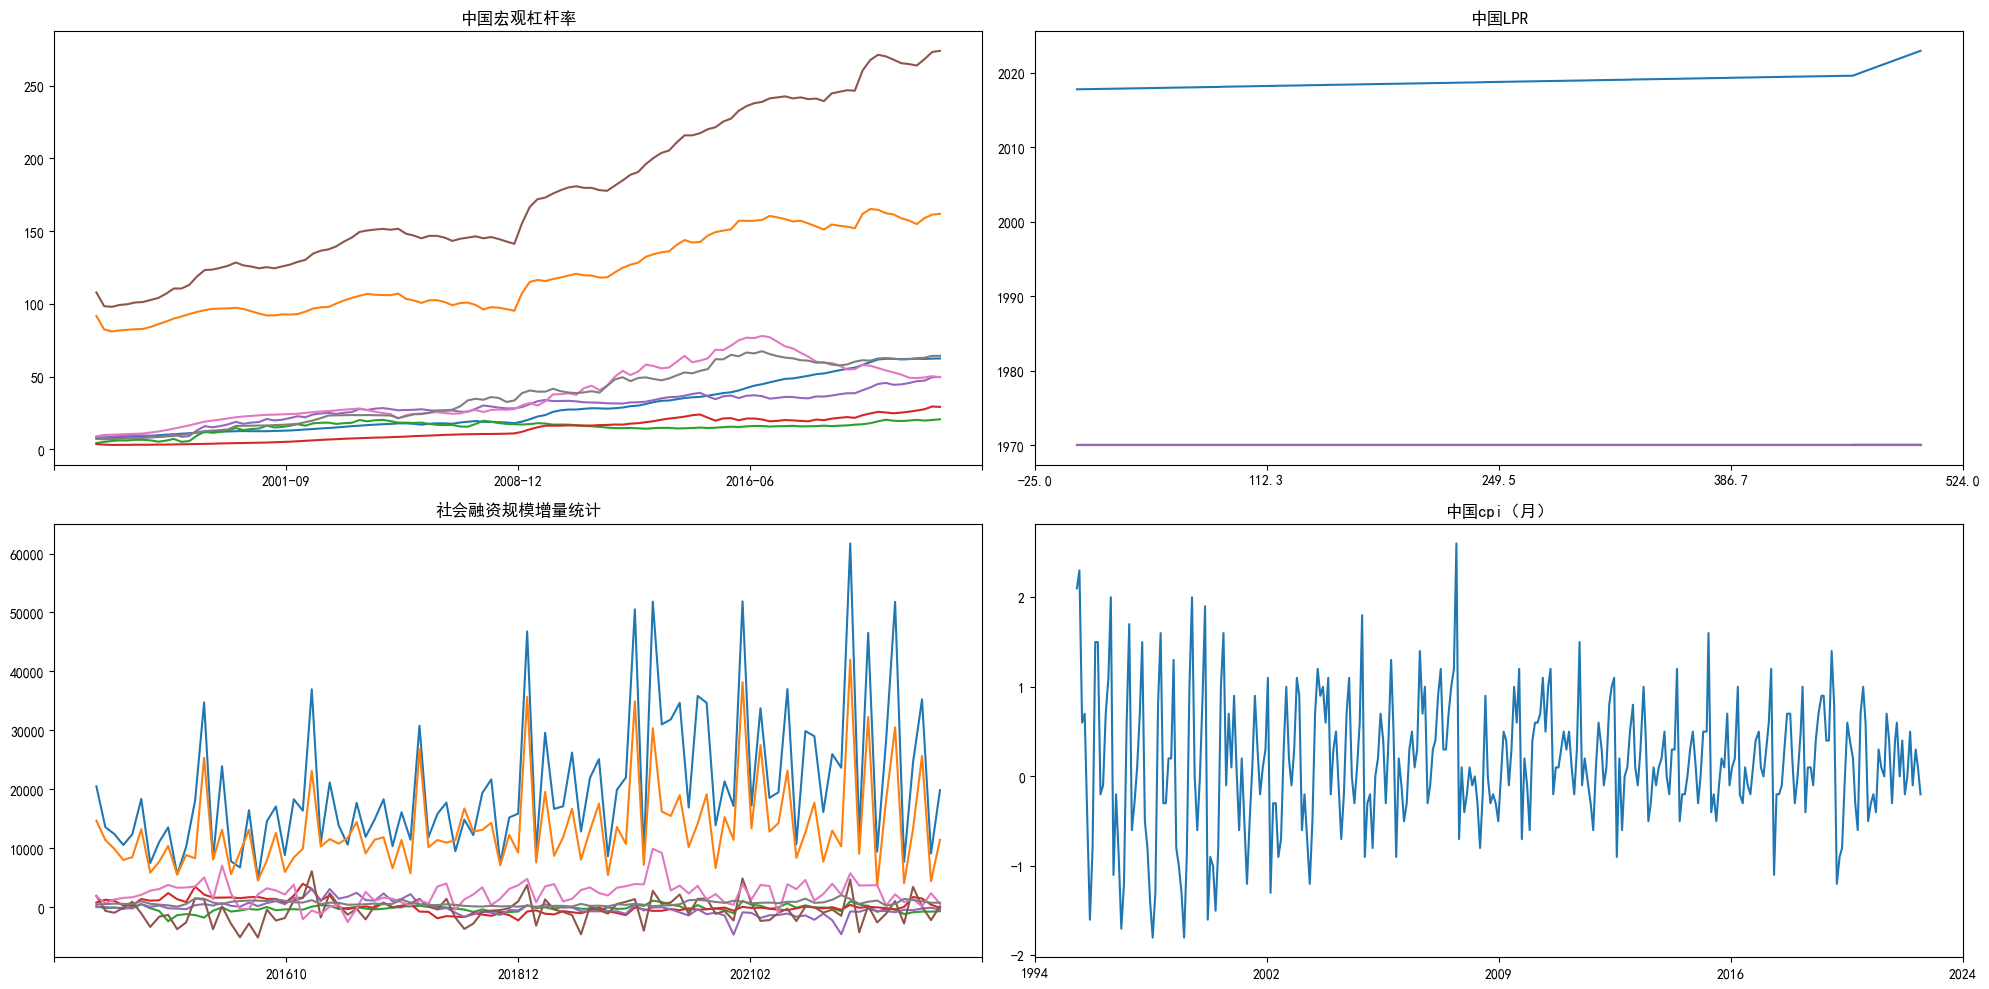

In [7]:
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax1 = plt.subplot(rows, cols, 1)
ax1.set_title('中国宏观杠杆率')
ax1.xaxis.set_major_locator(ticker.LinearLocator(5))
for col in chinaMacroLeverageRatioDf.columns:
    if (col != '年份'):
        # 绘制方法1 xArr yArr
        # ax1.plot(chinaMacroLeverageRatioDf['年份'], chinaMacroLeverageRatioDf[col], label=col)
        # 绘制方法2 xName yName
        ax1.plot('年份', col, data=chinaMacroLeverageRatioDf)
    
ax2 = plt.subplot(rows, cols, 2)
ax2.set_title('中国LPR')
ax2.xaxis.set_major_locator(ticker.LinearLocator(5))
for col in lprDf.columns:
    ax2.plot(lprDf.index, lprDf[col])
    
ax3 = plt.subplot(rows, cols, 3)
ax3.set_title('社会融资规模增量统计')
ax3.xaxis.set_major_locator(ticker.LinearLocator(5))
for col in chinaShrzgmDf.columns:
    if (col != '月份'):
        ax3.plot(chinaShrzgmDf['月份'], chinaShrzgmDf[col])
        
ax4 = plt.subplot(rows, cols, 4)
ax4.set_title('中国cpi（月）')
ax4.xaxis.set_major_locator(ticker.LinearLocator(5))
ax4.plot(chinaCpiMonthlyDf)

# 自动调整子图间距
plt.tight_layout()